implementation of ANN for IRIS dataset

#### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#### Loading data from CSV

In [2]:
folder='C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/'
df = pd.read_csv(folder+'iris.csv')

In [3]:
df.head(10)

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2
5,Setosa,48,31,16,2
6,Setosa,52,34,14,2
7,Setosa,49,36,14,1
8,Setosa,44,32,13,2
9,Setosa,50,35,16,6


#### Splitting data into attributes & target

In [4]:
attr = df.drop(columns=[ 'Species'])
target = df['Species']

In [5]:
attr.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,50,33,14,2
1,46,34,14,3
2,46,36,10,2
3,51,33,17,5
4,55,35,13,2


In [6]:
target=pd.get_dummies(target,prefix='ouput')
target.head()

,ouput_Setosa,ouput_Versicolor,ouput_Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Normalizing data

In [7]:
scaler = StandardScaler()
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-1.021849,0.558611,-1.340227,-1.315444
1,-1.506521,0.788808,-1.340227,-1.183812
2,-1.506521,1.249201,-1.567576,-1.315444
3,-0.900681,0.558611,-1.169714,-0.920548
4,-0.416010,1.019004,-1.397064,-1.315444


#### Splitting data into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(attr, target,random_state=82, test_size=0.3)

### Artificial Neural Network

In [9]:
model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Loss Curve

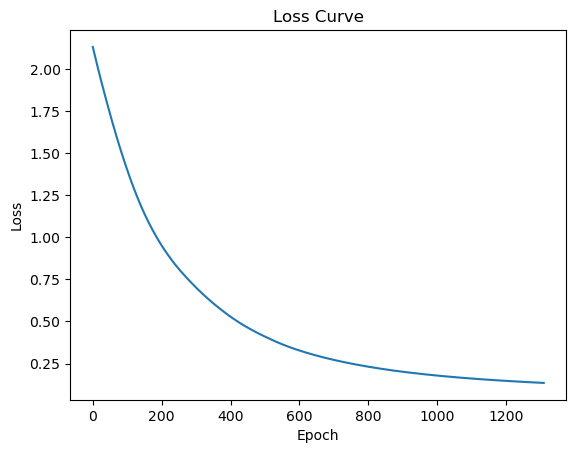

In [10]:
sns.lineplot(x=range(len(model.loss_curve_)), y=model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Evaluation

In [11]:
# Accuracy Score

accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy: {} ({:.2%})".format(accuracy, accuracy))

Accuracy: 0.9777777777777777 (97.78%)


In [ ]:
output_df=